# Service definitions

Feature layers can contain feature datasets with or without spatial information. In addition, they carry a lot of properties that inform client applications about their state, version, capabilities, extent, allowed operations etc, which make up its definition. Head over to the [documentation page](http://resources.arcgis.com/en/help/arcgis-rest-api/index.html#/Feature_Service/02r3000000z2000000/) to know about this in detail. This section of guide talks about how you can query such properties and update them.

In [1]:
# connect to your GIS with publisher or higher privileges
from arcgis.gis import GIS
gis = GIS('portal url', 'user name', 'password')

<Item title:"Ports along west coast" type:Feature Service owner:arcgis_python_api>
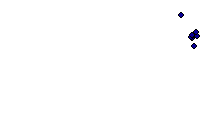

In [2]:
search_result= gis.content.search("Ports along west coast", "Feature Layer")
ports_item = search_result[0]
ports_item

## Update definition
The `manager` property of a `FeatureLayerCollection` object gives you access to `FeatureLayerCollectionManager` class which can be used to update the definitions of hosted feature services.

In [4]:
from arcgis.features import FeatureLayerCollection
ports_flc = FeatureLayerCollection.fromitem(ports_item)

Querying the `properties` property on a `FeatureLayerCollection` returns a dictionary reprentation of all properties. Let us inspect if metadata fields like description, copyright text are filled.

In [5]:
ports_flc.properties

{
  "hasVersionedData": false,
  "hasStaticData": false,
  "capabilities": "Query,Editing,Create,Update,Delete,Sync,Extract",
  "editorTrackingInfo": {
    "allowOthersToDelete": true,
    "allowOthersToQuery": true,
    "enableOwnershipAccessControl": false,
    "enableEditorTracking": false,
    "allowOthersToUpdate": true
  },
  "serviceDescription": "",
  "serviceItemId": "b0cb0c9f63e74e8480af0286eb9ac01f",
  "supportedQueryFormats": "JSON, geoJSON",
  "supportsApplyEditsWithGlobalIds": true,
  "maxRecordCount": 2000,
  "initialExtent": {
    "ymin": 2067451.3308849982,
    "xmin": -18000740.10863,
    "xmax": -12808635.83017,
    "ymax": 5895799.859614996,
    "spatialReference": {
      "wkid": 102100,
      "latestWkid": 3857
    }
  },
  "description": "",
  "syncEnabled": true,
  "allowGeometryUpdates": true,
  "spatialReference": {
    "wkid": 102100,
    "latestWkid": 3857
  },
  "enableZDefaults": false,
  "layers": [
    {
      "name": "ports_west_USA",
      "id": 0
    

Both the description and copyright is empty. We can update it by calling the `update_definition()` and passing a dictionary representation of the fields to be updated.

In [6]:
update_dict = {'description':'Updated using ArcGIS Python API',
              'copyrightText':'Rohit Singh'}
ports_flc.manager.update_definition(update_dict)

{'success': True}

Let us access the service definition once again to see if these fields are updated

In [7]:
ports_flc.properties.description

'Updated using ArcGIS Python API'

In [8]:
ports_flc.properties.copyrightText

'Rohit Singh'

### Turning off editing and sync capabilities
In addition to adding metadata, I would like to turn off sync and limit the capabilities to query.

In [10]:
update_dict2 = {"capabilities": "Query",
               "syncEnabled": False}
ports_flc.manager.update_definition(update_dict2)

{'success': True}

In [11]:
ports_flc.properties.capabilities

'Query'

In [12]:
ports_flc.properties.syncEnabled

False

In [13]:
"syncCapabilities" in ports_flc.properties

False

Turning off `syncEnabled` automatically removes `syncCapabilities`.